- taking max of caffeine per type of coffee due to not knowing differences
- From [mayo clinic](https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/caffeine/art-20049372) article/[the spruce](https://www.thespruceeats.com/caffeine-in-coffee-tea-cola-765276)
- looking at [matcha](https://www.breakawaymatcha.com/journal/5-reasons-to-drink-matcha-instead-of-coffee/) intake which has a different type of caffeine
- caffeine not accounted for in dark chocolate can also be a factor


|Drink|oz of liquid |Caffeine (in mg)|
|---|---|---|
|Coffee|8|165|
|Espresso|1|64|
|Decaf Espresso|1|0|
|Doppio|2|150|
|Decaf Doppio|2|16|
|Nespresso Espresso|-|65|
|Matcha|8|25|
|Green Tea|8|25|
|Hot Chocolate|8|70|
|Carmelato|8|126|


In [1]:
import pandas as pd

In [2]:
coffee_wine = pd.read_csv('../../Data/Caffeine Data/KatyCaffeineIntake_Wine.csv')

In [3]:
coffee_wine.dtypes


Date            object
Time            object
Type            object
Volume (oz)    float64
Kind            object
Prep Type       object
Notes           object
dtype: object

In [4]:
coffee_wine.head()

,Date,Time,Type,Volume (oz),Kind,Prep Type,Notes
0,1/7/19,9:00 AM,Coffee,12.0,Critical Mass,French Press,NaN
1,1/7/19,4:00 PM,Tea,12.0,TJs matcha,Instant,NaN
2,1/8/19,8:30 AM,Coffee,16.0,Critical Mass,French Press,NaN
3,1/8/19,4:15 PM,Coffee,2.0,Dancing Goats Decaf,Espresso,NaN
4,1/9/19,8:50 AM,Coffee,12.0,Critical Mass,French Press,NaN


In [5]:
coffee_wine['Notes'].fillna('', inplace = True)
coffee_wine['Prep Type'].fillna('None', inplace = True)

In [6]:
def is_decaf(string):
    new_str = string.split()
    counter = 0
    for i in new_str:
        if i.lower() == 'decaf':
            counter += 1
    return counter

In [7]:
is_decaf('Americano Decaf Decaf')

2

In [8]:
coffee_wine['isDecaf'] = coffee_wine['Kind'].apply(is_decaf)

In [9]:
remap_types = {
    'French Press':'Coffee',
    'Instant':'Matcha',
    'Espresso':'Espresso',
    'Nespresso':'Nespresso',
    'Drip':'Coffee',
    'Hot Chocolate':'Cocoa',
    'Carmelato':'Latte',
    'Starbucks':'Espresso',
    'None':'None'
}


In [10]:
coffee_wine['Prep Type']=coffee_wine['Prep Type'].map(remap_types)

In [11]:
coffee_wine.head()

,Date,Time,Type,Volume (oz),Kind,Prep Type,Notes,isDecaf
0,1/7/19,9:00 AM,Coffee,12.0,Critical Mass,Coffee,,0
1,1/7/19,4:00 PM,Tea,12.0,TJs matcha,Matcha,,0
2,1/8/19,8:30 AM,Coffee,16.0,Critical Mass,Coffee,,0
3,1/8/19,4:15 PM,Coffee,2.0,Dancing Goats Decaf,Espresso,,1
4,1/9/19,8:50 AM,Coffee,12.0,Critical Mass,Coffee,,0


In [12]:
coffee_wine.groupby(by = ['Prep Type','isDecaf']).count()

Date  Time  Type  Volume (oz)  Kind  Notes
Prep Type isDecaf                                            
Cocoa     0           1     1     1            1     1      1
Coffee    0          27    27    27           27    27     27
Espresso  0           2     2     2            2     2      2
          1           4     4     4            4     4      4
Latte     0           1     1     1            1     1      1
Matcha    0           7     7     7            7     7      7
Nespresso 0           2     2     2            2     2      2
          1           5     5     5            5     5      5
None      0           4     4     4            4     4      4

|Drink|oz of liquid |Caffeine (in mg)|
|---|---|---|
|Coffee|8|165|
|Espresso|1|64|
|Decaf Espresso|1|0|
|Doppio|2|150|
|Decaf Doppio|2|16|
|Nespresso Espresso|-|65|
|Matcha|8|25|
|Green Tea|8|25|
|Hot Chocolate|8|70|
|Carmelato|8|126|

In [13]:
def transform_mg(df,vol,a,b):
    if df[a] == 'Espresso' and df[b] == 1:
        return df[vol]/2 * 16
    elif df[a] == 'Nespresso' and df[b] ==1:
        return df[vol]/2 * 10
    elif df[a] == 'Coffee' and df[b] == 0:
        return df[vol]/8 * 165
    elif df[a] == 'Espresso' and df[b] == 0:
        return df[vol]/2 * 150
    elif df[a] == 'Cocoa' and df[b] == 0:
        return df[vol]/8 * 70
    elif df[a] == 'Latte' and df[b] == 0:
        return df[vol]/8 * 126
    elif df[a] == 'Matcha' and df[b] == 0:
        return df[vol]/8 * 40
    elif df[a] == 'Nespresso' and df[b] == 0:
        return df[vol]/2 * 65
    else:
        return 0

In [14]:
coffee_wine.columns

Index(['Date', 'Time', 'Type', 'Volume (oz)', 'Kind', 'Prep Type', 'Notes',
       'isDecaf'],
      dtype='object')

In [15]:
mapped_caffeine_mgs= []
for index, row in coffee_wine.iterrows():
    mapped_mgs = {}
    mapped_mgs['caffeine_mgs'] = transform_mg(row,'Volume (oz)','Prep Type','isDecaf')
    mapped_caffeine_mgs.append(mapped_mgs)

In [16]:
mgs = pd.DataFrame(mapped_caffeine_mgs)

In [17]:
merged_coffee_wine = pd.merge(coffee_wine,mgs, on = coffee_wine.index)

In [18]:
merged_coffee_wine.columns

Index(['key_0', 'Date', 'Time', 'Type', 'Volume (oz)', 'Kind', 'Prep Type',
       'Notes', 'isDecaf', 'caffeine_mgs'],
      dtype='object')

In [19]:
merged_coffee_wine.drop(columns = ['key_0'],inplace = True)

In [20]:
merged_coffee_wine.head()

,Date,Time,Type,Volume (oz),Kind,Prep Type,Notes,isDecaf,caffeine_mgs
0,1/7/19,9:00 AM,Coffee,12.0,Critical Mass,Coffee,,0,247.5
1,1/7/19,4:00 PM,Tea,12.0,TJs matcha,Matcha,,0,60.0
2,1/8/19,8:30 AM,Coffee,16.0,Critical Mass,Coffee,,0,330.0
3,1/8/19,4:15 PM,Coffee,2.0,Dancing Goats Decaf,Espresso,,1,16.0
4,1/9/19,8:50 AM,Coffee,12.0,Critical Mass,Coffee,,0,247.5


In [24]:
merged_coffee_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume (oz),53.0,8.783019,4.868965,1.0,3.0,10.0,12.0,16.0
isDecaf,53.0,0.169811,0.379060,0.0,0.0,0.0,0.0,1.0
caffeine_mgs,53.0,147.320755,113.106181,0.0,40.0,165.0,247.5,330.0


In [26]:
pd.DataFrame(merged_coffee_wine.groupby(by = 'Date')['Time'].count()).to_csv('count_drinks.csv')

In [27]:
pd.DataFrame(merged_coffee_wine.groupby(by = 'Date')['caffeine_mgs'].sum()).to_csv('caffeine_mgs.csv')

In [28]:
import matplotlib.pyplot as plt

In [29]:
merged_coffee_wine.dtypes

Date             object
Time             object
Type             object
Volume (oz)     float64
Kind             object
Prep Type        object
Notes            object
isDecaf           int64
caffeine_mgs    float64
dtype: object

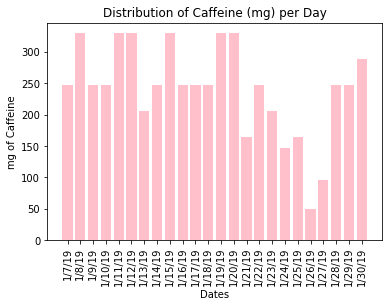

In [30]:
plt.bar(merged_coffee_wine['Date'],merged_coffee_wine['caffeine_mgs'],color ='pink')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('mg of Caffeine')
plt.title('Distribution of Caffeine (mg) per Day');